# Statistische kwaliteitscontrole

![quality](quality.jpg)

## Situatie

De firma Glow BV produceert lampen.

- Bekend is dat **2%** van de productie defecten bevat
- De dagproductie bestaat uit **75.000 lampen**

## Opdracht

- Onderzoek hoeveel kapotte lampen je tegenkomt als je **25 lampen** uit de totale dagproductie inspecteert
- Voer de inspectie **10 maal** uit
- Maak een kort overzicht van je bevindingen (in Excel, met MatplotLib of met print-statements)

Begin met de analyse hieronder.

## Stap 1: analyseren

- Bedenk hoe je de productie en de productiefout simuleert (zie stap 2 voor een hint)
- Bedenk hoe het inspectieproces verloopt

**Hint**: zitten er functies in de [random module](https://www.w3schools.com/python/module_random.asp) die passen bij deze opdracht?

## Stap 2: schetsen

Werk op basis van je analyse stapsgewijs een oplossing uit, bijvoorbeeld:

In [424]:
# 1. Genereer een lijst met functionele lampen (hoeveel?)

#Number of functional lamps = 0.98 * 75,000 = 73,500
#Number of defective lamps = 0.02 * 75,000 = 1,500


import random

total_lamps = 75000
defective_percentage = 2
defective_lamps = int((defective_percentage / 100) * total_lamps)
defective_lamps = onal_lamps = total_lamps - functional_lamps

lamp_list = [1] * defective_lamps + [0] * functional_lamps
random.shuffle(lamp_list)

print("Number of functional lamps:", functional_lamps)
print("Number of defective lamps:", defective_lamps)
print("List of lamps:")
print(len(lamp_list))


Number of functional lamps: 73500
Number of defective lamps: 1500
List of lamps:
75000


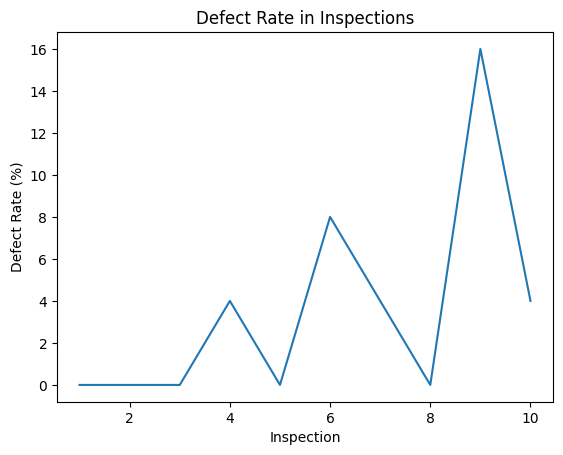

In [444]:
import matplotlib.pyplot as plt


def calculate_defect_rate(sample):
    defect_count = sum(sample)
    defect_rate = (defect_count / len(sample)) * 100
    return defect_rate


def perform_inspection(num_lamps):
    sample = random.choices(lamp_list, k=num_lamps)
    return calculate_defect_rate(sample)

num_inspections = 10
inspection_results = []

for _ in range(num_inspections):
    defect_rate = perform_inspection(25)
    inspection_results.append(defect_rate)

plt.plot(range(1, num_inspections + 1), inspection_results)
plt.xlabel('Inspection')
plt.ylabel('Defect Rate (%)')
plt.title('Defect Rate in Inspections')
plt.show()


In [446]:
print(inspection_results)
print(calculate_defect_rate(inspection_results)/100)

[0.0, 0.0, 0.0, 4.0, 0.0, 8.0, 4.0, 0.0, 16.0, 4.0]
3.6


- Als bovenstaande niet lukt dan zal het implementeren ook niet lukken...
- Vraag om hulp, maar oefen eerst met het uitwerken van een oplossing

## Stap 3: implementeren

- Werk de bovenstaande schets stap voor stap uit
- Begin pas met implementeren als de schets klopt

In [ ]:
# Stappenplan schets


# Implementatie

## Stap 4: reflecteren

1. (a) Komt het gemiddelde van je inspectie overeen met de daadwerkelijke productiefout?

   (b) Zo nee: hoeveel inspecties moet je dan doen om in de buurt te komen van de 2%?

2. (a) Is het verstandig om kosten te drukken en maar 5 inspecties uit te voeren?
       With only 5 inspections, the sample size is relatively small.

   (b) Of per inspectie slechts 15 lampen te onderzoeken?

3. (a) Maakt het uit of je de lampen na inspectie terugstopt in de batch?

   (b) Kun je dit aantonen met je simulatie?

In [403]:
num_inspections = 0
defect_rate = 0

while defect_rate < 2:
    num_inspections += 1
    sample = random.choices([0, 1], k=25)  # Randomly select 25 lamps from the batch
    defect_count = sum(sample)  # Count the number of defective lamps in the sample
    defect_rate = (defect_count / 25) * 100  # Calculate the defect rate as a percentage

print("Number of inspections needed to approach the 2% defect rate:", num_inspections)


Number of inspections needed to approach the 2% defect rate: 1


In [2]:
import random

total_lamps = 75000
defective_percentage = 2
defective_lamps = int((defective_percentage / 100) * total_lamps)
functional_lamps = total_lamps - defective_lamps

def calculate_defect_rate(sample):
    defect_count = sum(sample)
    defect_rate = (defect_count / len(sample)) * 100
    return defect_rate

def perform_inspection(num_lamps, return_lamps):
    sample = random.choices(lamp_list, k=num_lamps)
    defect_rate = calculate_defect_rate(sample)

    if return_lamps:
        return defect_rate, sample
    else:
        return defect_rate

lamp_list = [0] * defective_lamps + [1] * functional_lamps
random.shuffle(lamp_list)

# Inspectie met terugplaatsing
defect_rate_with_return, sample_with_return = perform_inspection(25, True)
print("Defect rate with returning lamps:", defect_rate_with_return)
print("Sample with returning lamps:", sample_with_return)

# Inspectie zonder terugplaatsing
defect_rate_without_return = perform_inspection(25, False)
print("Defect rate without returning lamps:", defect_rate_without_return)


Defect rate with returning lamps: 92.0
Sample with returning lamps: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1]
Defect rate without returning lamps: 100.0


## Extra: variatie in productiefout

De aanname is dat 2% van de productie defecten bevat, maar dit is slechts een **gemiddelde** is. Soms is het 3% dan weer 2% of zelfs 5%. De productiefout hangt namelijk weer af van de productiefout in de onderdelen waaruit de lamp is opgebouwd.

- Breid je model uit waarin je de productiefout laat varieren met 1%
- Maak dit voor de inspectie uit?

In [ ]:
# Uitbreiding

# ...

## Extra: Bayesiaanse statistiek

In de bijlage vind je een csv bestand met daarin een onbekend aantal lampen waarvan er een aantal stuk zijn.

1. Lees het bestand in en achterhaal met een aantal inspecties wat het percentage defecte lampen moet zijn

2. Controleer daarna of dit juist was door de totale lijst met lampen te analyseren

Bovenstaande is een voorbeeld van Baysiaanse statistiek.